 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")


# YOUR CODE HERE

whale_returns_csv = Path("whale_returns.csv")
algo_returns_csv = Path("algo_returns.csv")
sp500_history_csv = Path("sp500_history.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format= True, parse_dates= True)
algo_df = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format= True, parse_dates= True)
sp500_df = pd.read_csv(sp500_history_csv, index_col='Date', infer_datetime_format= True, parse_dates= True)

In [3]:
# Count nulls
whale_df.isnull().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna()
whale_df = whale_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
# YOUR CODE HERE 
algo_df = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format= True, parse_dates= True)

In [6]:
# Count nulls
# YOUR CODE HERE
algo_df = algo_df.sort_index()
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna()
algo_df = algo_df.dropna()

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col='Date', infer_datetime_format= True, parse_dates= True)


In [9]:
# Check Data Types
# YOUR CODE HERE
sp500_df = sp500_df.sort_index()
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE

sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].str.replace(",", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes


Close    float64
dtype: object

In [11]:
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_df.pct_change()
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Drop nulls
# YOUR CODE HERE
sp500_returns.dropna()
sp500_returns = sp500_returns.dropna()


In [14]:
# Rename Column
# YOUR CODE HERE
sp500_returns = sp500_returns.rename(columns = {"Close": "SP500"})
sp500_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

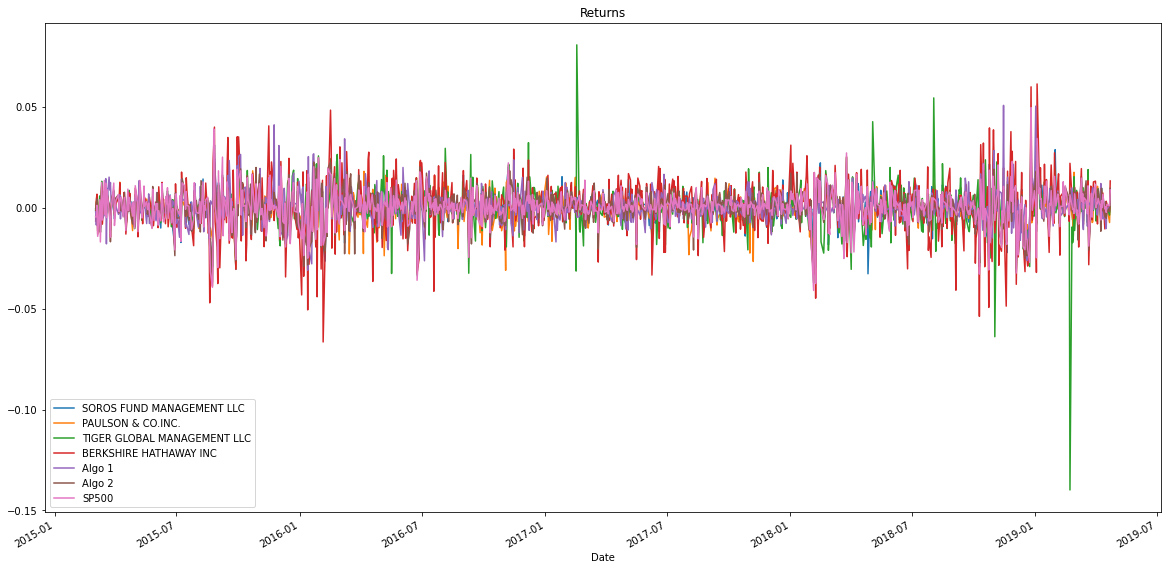

In [16]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize = (20,10), title = "Returns")

In [17]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

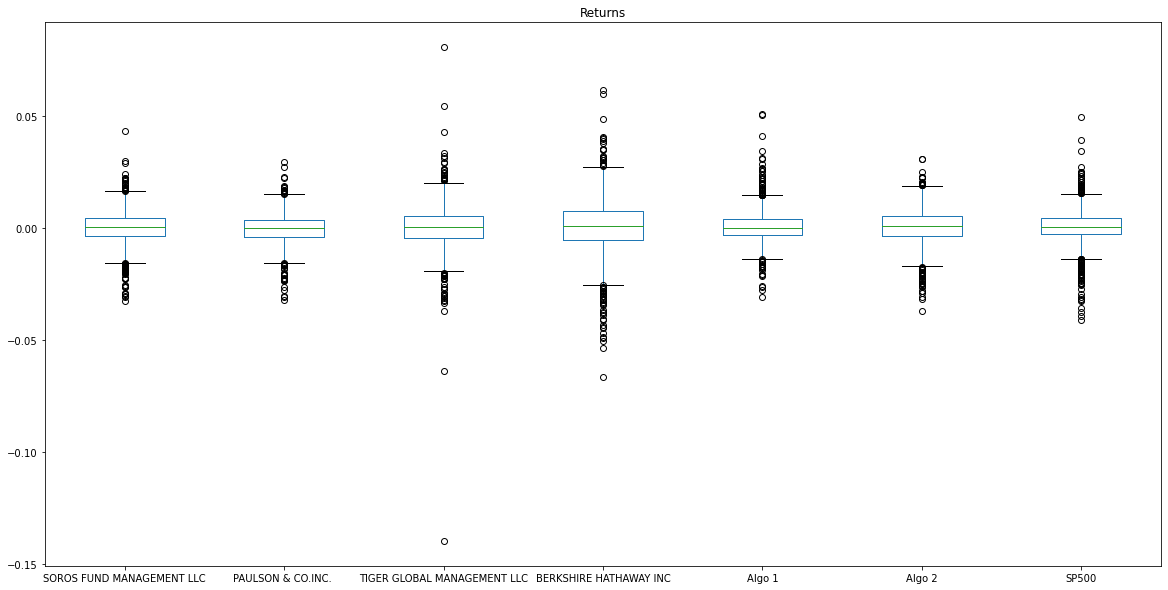

In [18]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_df.plot(kind="box", figsize = (20,10), title="Returns")



In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_df.std()
daily_std.head()
 

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()

#Berkshire and Tiger Global are riskier

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
dtype: float64

In [21]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

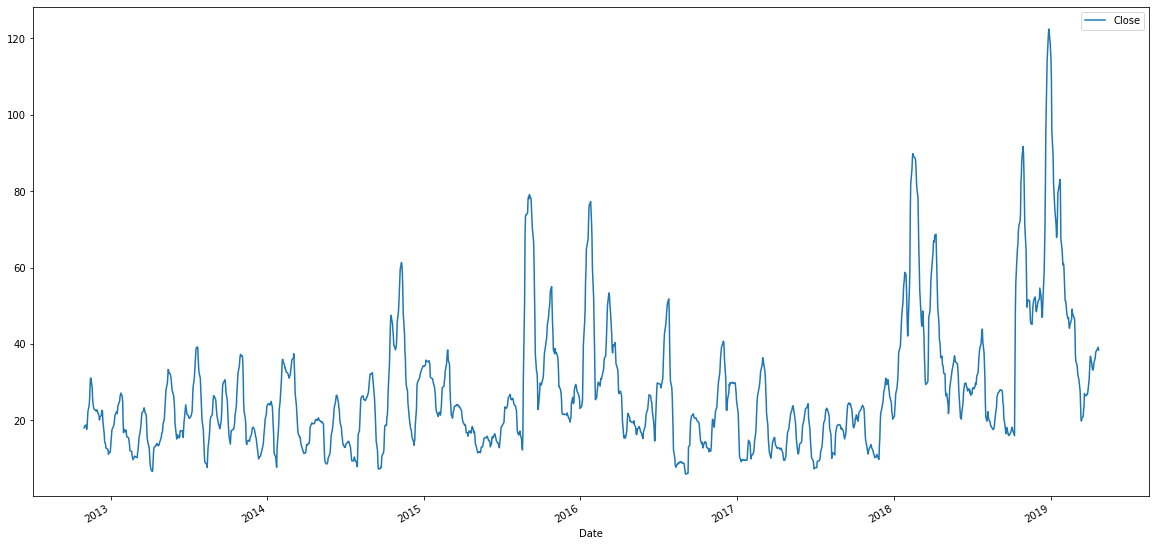

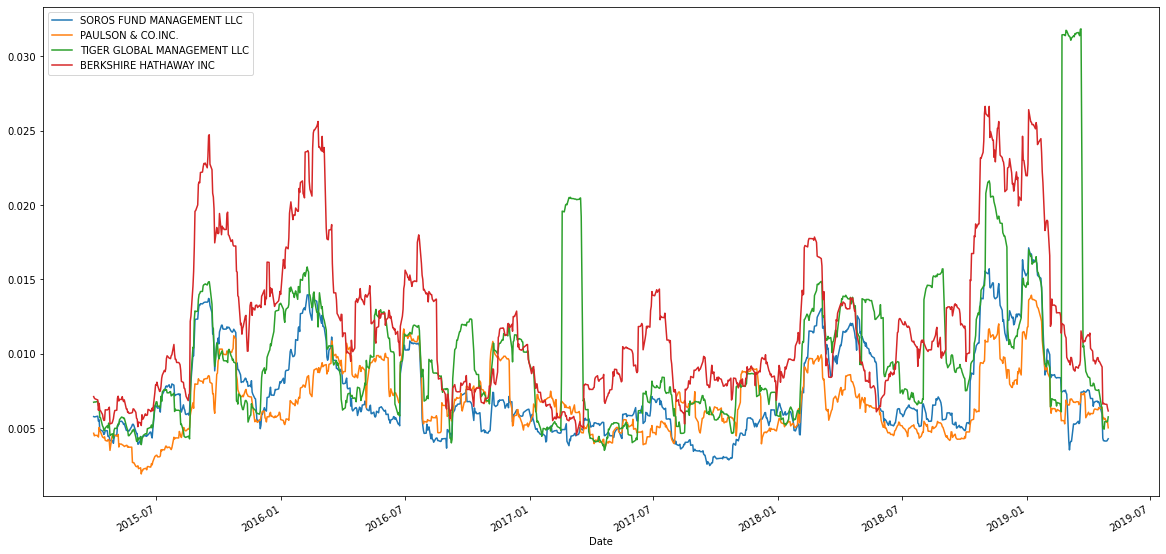

In [22]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
sp500_df.rolling(window=21).std().plot(figsize=(20, 10))
whale_df.rolling(window=21).std().plot(figsize=(20, 10))

In [23]:
# Construct a correlation table
# YOUR CODE HERE
corr_df = combined_df.corr()

#Display correlation matrix
corr_df.style.background_gradient(cmap="summer")




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
daily_returns = combined_df.pct_change()
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(combined_df['SP500'])
variance = combined_df['SP500'].rolling(window=21).var()

soros_beta = covariance / variance
soros_beta





Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.951736
2019-04-17    0.955738
2019-04-18    0.944985
2019-04-22    0.883439
2019-04-23    0.823733
Length: 1043, dtype: float64

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

combined_df.ewm(com=.5).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.001356,0.001186,-0.002024,0.001518,-0.006927,0.001575,-0.004426
2015-03-05,0.003198,0.003187,0.001007,0.005124,-0.002793,0.003478,-0.000534
2015-03-06,-0.004297,-0.001377,-0.005397,-0.007176,-0.004253,-0.006606,-0.009741
2015-03-09,-0.001031,0.002373,0.002127,-0.003478,-0.005052,-0.001311,-0.000580
...,...,...,...,...,...,...,...
2019-04-16,0.002055,-0.000123,-0.000159,-0.001206,-0.005956,0.001263,0.000705
2019-04-17,-0.001246,-0.004352,-0.002993,0.001746,-0.008853,-0.003065,-0.001281
2019-04-18,0.000550,-0.000636,-0.000610,0.001859,-0.003343,-0.001841,0.000626


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() *252 / (combined_df.std() * np.sqrt(252)))


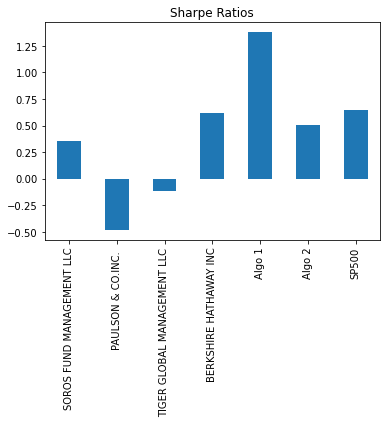

In [27]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
# YOUR CODE HERE
tsla_path = Path("TSLA_DATA.csv")
tsla_data = pd.read_csv(tsla_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
tsla_data = tsla_data.sort_index()
tsla_data.head()

,Close
Date,
2015-03-03 16:00:00,39.91
2015-03-04 16:00:00,40.49
2015-03-05 16:00:00,40.13
2015-03-06 16:00:00,38.78
2015-03-09 16:00:00,38.18


In [29]:
# Read the second stock
# YOUR CODE HERE
goog_path = Path("Google_DATA.csv")
goog_data = pd.read_csv(goog_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
goog_data = goog_data.sort_index()
goog_data.head()


,Close
Date,
2015-03-03 16:00:00,572.07
2015-03-04 16:00:00,571.80
2015-03-05 16:00:00,573.76
2015-03-06 16:00:00,566.13
2015-03-09 16:00:00,567.29


In [30]:
# Read the third stock
# YOUR CODE HERE
nflx_path = Path("NFLX_DATA.csv")
nflx_data = pd.read_csv(nflx_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
nflx_data = nflx_data.sort_index()
nflx_data.head()

,Close
Date,
2015-03-03 16:00:00,67.82
2015-03-04 16:00:00,67.11
2015-03-05 16:00:00,66.81
2015-03-06 16:00:00,64.87
2015-03-09 16:00:00,63.66


In [37]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

gtn_df = pd.concat([tsla_data, goog_data, nflx_data], axis="columns", join="inner")
gtn_df.head()

#pivot table here

,Close,Close,Close
Date,,,
2015-03-03 16:00:00,39.91,572.07,67.82
2015-03-04 16:00:00,40.49,571.80,67.11
2015-03-05 16:00:00,40.13,573.76,66.81
2015-03-06 16:00:00,38.78,566.13,64.87
2015-03-09 16:00:00,38.18,567.29,63.66


In [32]:
# Reset the index
# YOUR CODE HERE
gtn_df = gtn_df.rename(columns={: })
gtn_df.head()


,Date,Close,Close,Close
0,2015-03-03 16:00:00,39.91,572.07,67.82
1,2015-03-04 16:00:00,40.49,571.80,67.11
2,2015-03-05 16:00:00,40.13,573.76,66.81
3,2015-03-06 16:00:00,38.78,566.13,64.87
4,2015-03-09 16:00:00,38.18,567.29,63.66


In [33]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
gtn_df = gtn_df.pivot_table(values='Close', index='Date', columns='Symbol')

In [38]:
# Drop Nulls
# YOUR CODE HERE
gtn_df = gtn_df.pct_change()
gtn_df = gtn_df.dropna()


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
gtn_returns = gtn_df.dot(weights)
gtn_returns.index = gtn_returns.index.date
gtn_returns

2015-03-04    0.001197
2015-03-05   -0.003311
2015-03-06   -0.025325
2015-03-09   -0.010692
2015-03-10   -0.017063
                ...   
2019-02-22    0.013670
2019-02-25    0.005107
2019-02-26    0.001688
2019-02-27    0.017270
2019-02-28    0.002228
Length: 1005, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
combined_df["my port"]= gtn_returns
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,my port
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.001197
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.003311
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.025325
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.010692
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,NaN
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,NaN
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,NaN


In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_df.dropna()
combined_df = combined_df.dropna()
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,my port
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.001197
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.003311
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.025325
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.010692
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.017063
...,...,...,...,...,...,...,...,...
2019-02-22,0.001011,0.004447,-0.139820,0.022029,0.002395,0.008799,0.006411,0.013670
2019-02-25,-0.002242,-0.003639,-0.009525,0.005358,0.009834,-0.000968,0.001232,0.005107
2019-02-26,-0.006030,-0.006118,-0.017294,-0.001617,0.005112,-0.002075,-0.000790,0.001688


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [48]:
# Risk
# YOUR CODE HERE

combined_std = combined_df.std()
combined_std = combined_std.sort_values(ascending=False)
combined_std

my port                        0.017830
BERKSHIRE HATHAWAY INC         0.013041
TIGER GLOBAL MANAGEMENT LLC    0.011010
SP500                          0.008631
Algo 2                         0.008384
SOROS FUND MANAGEMENT LLC      0.007951
Algo 1                         0.007692
PAULSON & CO.INC.              0.007072
dtype: float64

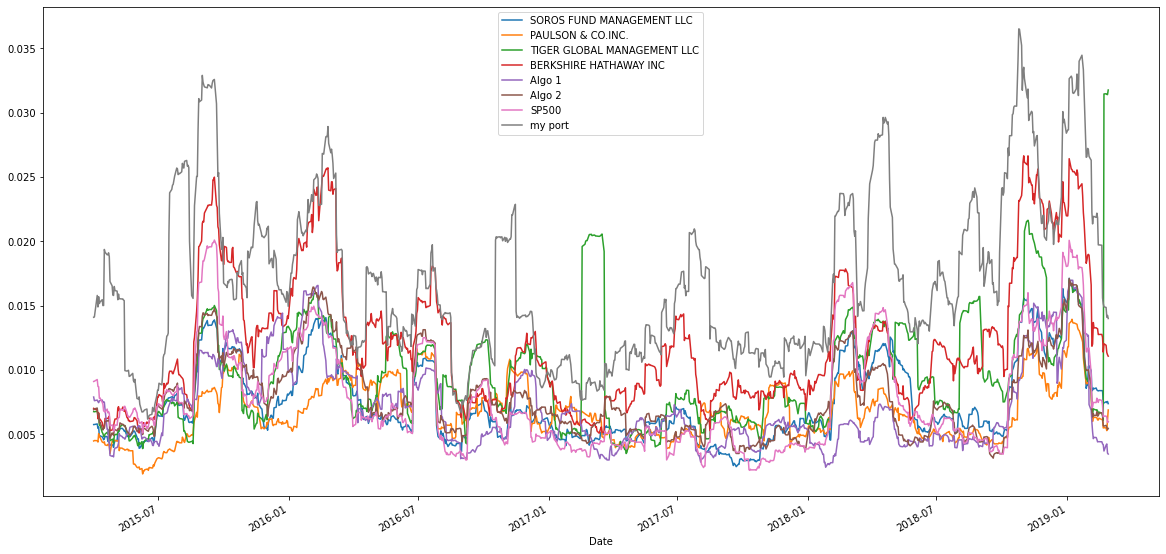

In [49]:
# Rolling
# YOUR CODE HERE
combined_df.rolling(window=21).std().plot(figsize=(20, 10))

In [50]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() *252 / (combined_df.std() * np.sqrt(252)))

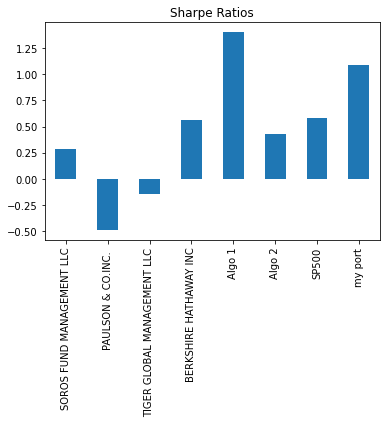

In [51]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [52]:
# Create a correlation analysis
# YOUR CODE HERE
corr_combined_df = combined_df.corr()

#Display correlation matrix
corr_combined_df.style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,my port
SOROS FUND MANAGEMENT LLC,1.000000,0.700450,0.558610,0.754673,0.327696,0.826463,0.836110,0.586149
PAULSON & CO.INC.,0.700450,1.000000,0.433192,0.548799,0.275369,0.677712,0.669880,0.443294
TIGER GLOBAL MANAGEMENT LLC,0.558610,0.433192,1.000000,0.422188,0.166660,0.507382,0.623237,0.385129
BERKSHIRE HATHAWAY INC,0.754673,0.548799,0.422188,1.000000,0.295760,0.690050,0.750046,0.716871
Algo 1,0.327696,0.275369,0.166660,0.295760,1.000000,0.297049,0.284274,0.227197
Algo 2,0.826463,0.677712,0.507382,0.690050,0.297049,1.000000,0.859668,0.554097
SP500,0.836110,0.669880,0.623237,0.750046,0.284274,0.859668,1.000000,0.649112
my port,0.586149,0.443294,0.385129,0.716871,0.227197,0.554097,0.649112,1.000000


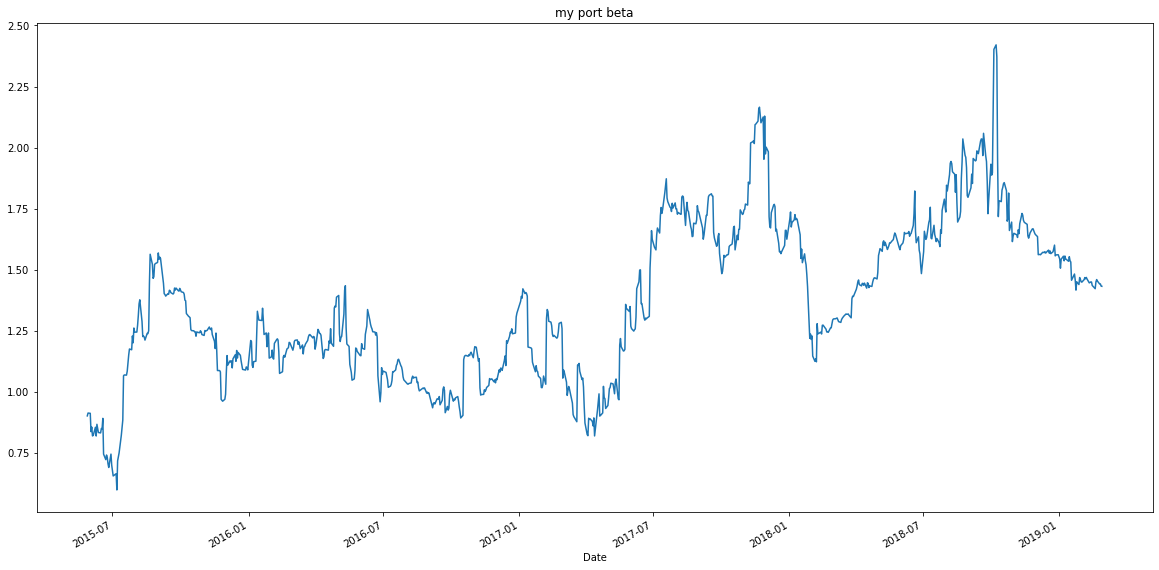

In [59]:
# Beta
# YOUR CODE HERE
daily_returns = combined_df.pct_change()
covariance = combined_df['my port'].rolling(window=60).cov(combined_df["SP500"])
variance = combined_df['SP500'].rolling(window=60).var()

port_beta = covariance / variance
port_beta = port_beta.dropna()
port_beta.plot(figsize=(20,10), title= "my port beta")